<a href="https://colab.research.google.com/github/tawadros312/Machine-learning-Implmentations/blob/master/Regression_on_Ames_Housing_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
from google.colab import files
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline,Pipeline
import seaborn as ses
from sklearn.preprocessing import StandardScaler,OneHotEncoder
#IterativeImputer is only available in scikit-learn 0.21,
#which as of April 2019 is only released as a developer version, not as stable,so that is why we need this line of code in colab
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,KNNImputer,IterativeImputer
import numpy as np 
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.compose import make_column_transformer
import sklearn
print(sklearn.__version__)


0.22.2.post1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#data is at https://github.com/tawadros312/Machine-learning-Implmentations/blob/master/Task2/AmesHousing.xls

uploded=files.upload()

Saving AmesHousing.xls to AmesHousing.xls


In [ ]:
data=pd.read_excel(io.BytesIO(uploded['AmesHousing.xls']))
Ames=data.copy()
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:

print(data.shape)
data.describe(include='all')

(2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930,2440.000000,2930.000000,2930,198,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930.000000,2930.000000,2930.000000,2930.000000,2930,2930,2930,2930,2907,2907.000000,2930,2930,2930,2850,2850,2847,2850,2929.000000,2849,2929.000000,2929.000000,2929.000000,...,2930,2929,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930,2930.000000,2930,2930.000000,1508,2773,2771.000000,2771,2929.000000,2929.000000,2771,2771,2930,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,13,572,106,2930.000000,2930.000000,2930.000000,2930,2930,2930.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,3,5,3,28,9,8,5,8,NaN,NaN,NaN,NaN,6,8,16,17,5,NaN,4,5,6,5,5,4,6,NaN,6,NaN,NaN,NaN,...,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,8,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,4,4,5,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,...,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,NaN,2273,NaN,NaN,2918,120,1859,2633,2927,2140,2789,443,2522,2900,2425,1481,NaN,NaN,NaN,NaN,2321,2887,1026,1015,1752,NaN,1799,2549,1310,1283,2616,1906,859,NaN,2499,NaN,NaN,NaN,...,2734,2682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1494,NaN,2728,NaN,744,1731,NaN,1231,NaN,NaN,2615,2665,2652,NaN,NaN,NaN,NaN,NaN,NaN,4,330,95,NaN,NaN,NaN,2536,2413,NaN
mean,1465.50000,7.144645e+08,57.387372,NaN,69.224590,10147.921843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.094881,5.563140,1971.356314,1984.266553,NaN,NaN,NaN,NaN,NaN,101.896801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442.629566,NaN,49.722431,559.262547,1051.614544,...,NaN,NaN,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,NaN,6.443003,NaN,0.599317,NaN,NaN,1978.132443,NaN,1.766815,472.819734,NaN,NaN,NaN,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,NaN,NaN,NaN,50.635154,6.216041,2007.790444,NaN,NaN,180796.060068
std,845.96247,1.887308e+08,42.638025,NaN,23.365335,7880.017759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.411026,1.111537,30.245361,20.860286,NaN,NaN,NaN,NaN,NaN,179.112611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.590839,NaN,169.168476,439.494153,440.615067,...,NaN,NaN,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,NaN,1.572964,NaN,0.647921,NaN,NaN,25.528411,NaN,0.760566,215.046549,NaN,NaN,NaN,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,NaN,NaN,NaN,566.344288,2.714492,1.316613,NaN,NaN,79886.692357
min,1.00000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,334.000000,

In [ ]:
data.info

<bound method DataFrame.info of       Order        PID  MS SubClass  ... Sale Type  Sale Condition  SalePrice
0         1  526301100           20  ...       WD           Normal     215000
1         2  526350040           20  ...       WD           Normal     105000
2         3  526351010           20  ...       WD           Normal     172000
3         4  526353030           20  ...       WD           Normal     244000
4         5  527105010           60  ...       WD           Normal     189900
...     ...        ...          ...  ...       ...             ...        ...
2925   2926  923275080           80  ...       WD           Normal     142500
2926   2927  923276100           20  ...       WD           Normal     131000
2927   2928  923400125           85  ...       WD           Normal     132000
2928   2929  924100070           20  ...       WD           Normal     170000
2929   2930  924151050           60  ...       WD           Normal     188000

[2930 rows x 82 columns]>

In [ ]:
print(list(data.dtypes))

[dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('float64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('float64'), dtype('float64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('int64'), dtype('O'), dtype('int64'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('float64'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('in

In [ ]:


target=data.SalePrice
data=data.drop(columns=['SalePrice'])
module_data=data.copy()


In [ ]:

categ=list(set(data.columns)-set(data.describe().columns))
data_numer=data.drop(columns=categ)
data_numer.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010


In [ ]:
numeric=data_numer.columns
print(type(categ))
print(categ)
print(numeric)

<class 'list'>
['Utilities', 'Roof Matl', 'Exterior 1st', 'Functional', 'Bsmt Qual', 'Neighborhood', 'Heating QC', 'Sale Type', 'Sale Condition', 'Alley', 'Land Slope', 'Exter Qual', 'Condition 2', 'Foundation', 'Fireplace Qu', 'Mas Vnr Type', 'Central Air', 'Heating', 'Garage Qual', 'Fence', 'MS Zoning', 'Street', 'Bsmt Cond', 'Lot Shape', 'Bsmt Exposure', 'Electrical', 'Exter Cond', 'Roof Style', 'Exterior 2nd', 'Misc Feature', 'House Style', 'Garage Cond', 'Condition 1', 'Garage Finish', 'Lot Config', 'Land Contour', 'Kitchen Qual', 'Bldg Type', 'Garage Type', 'BsmtFin Type 1', 'Pool QC', 'Paved Drive', 'BsmtFin Type 2']
Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath',

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cbc547b38>,
      dtype=object)

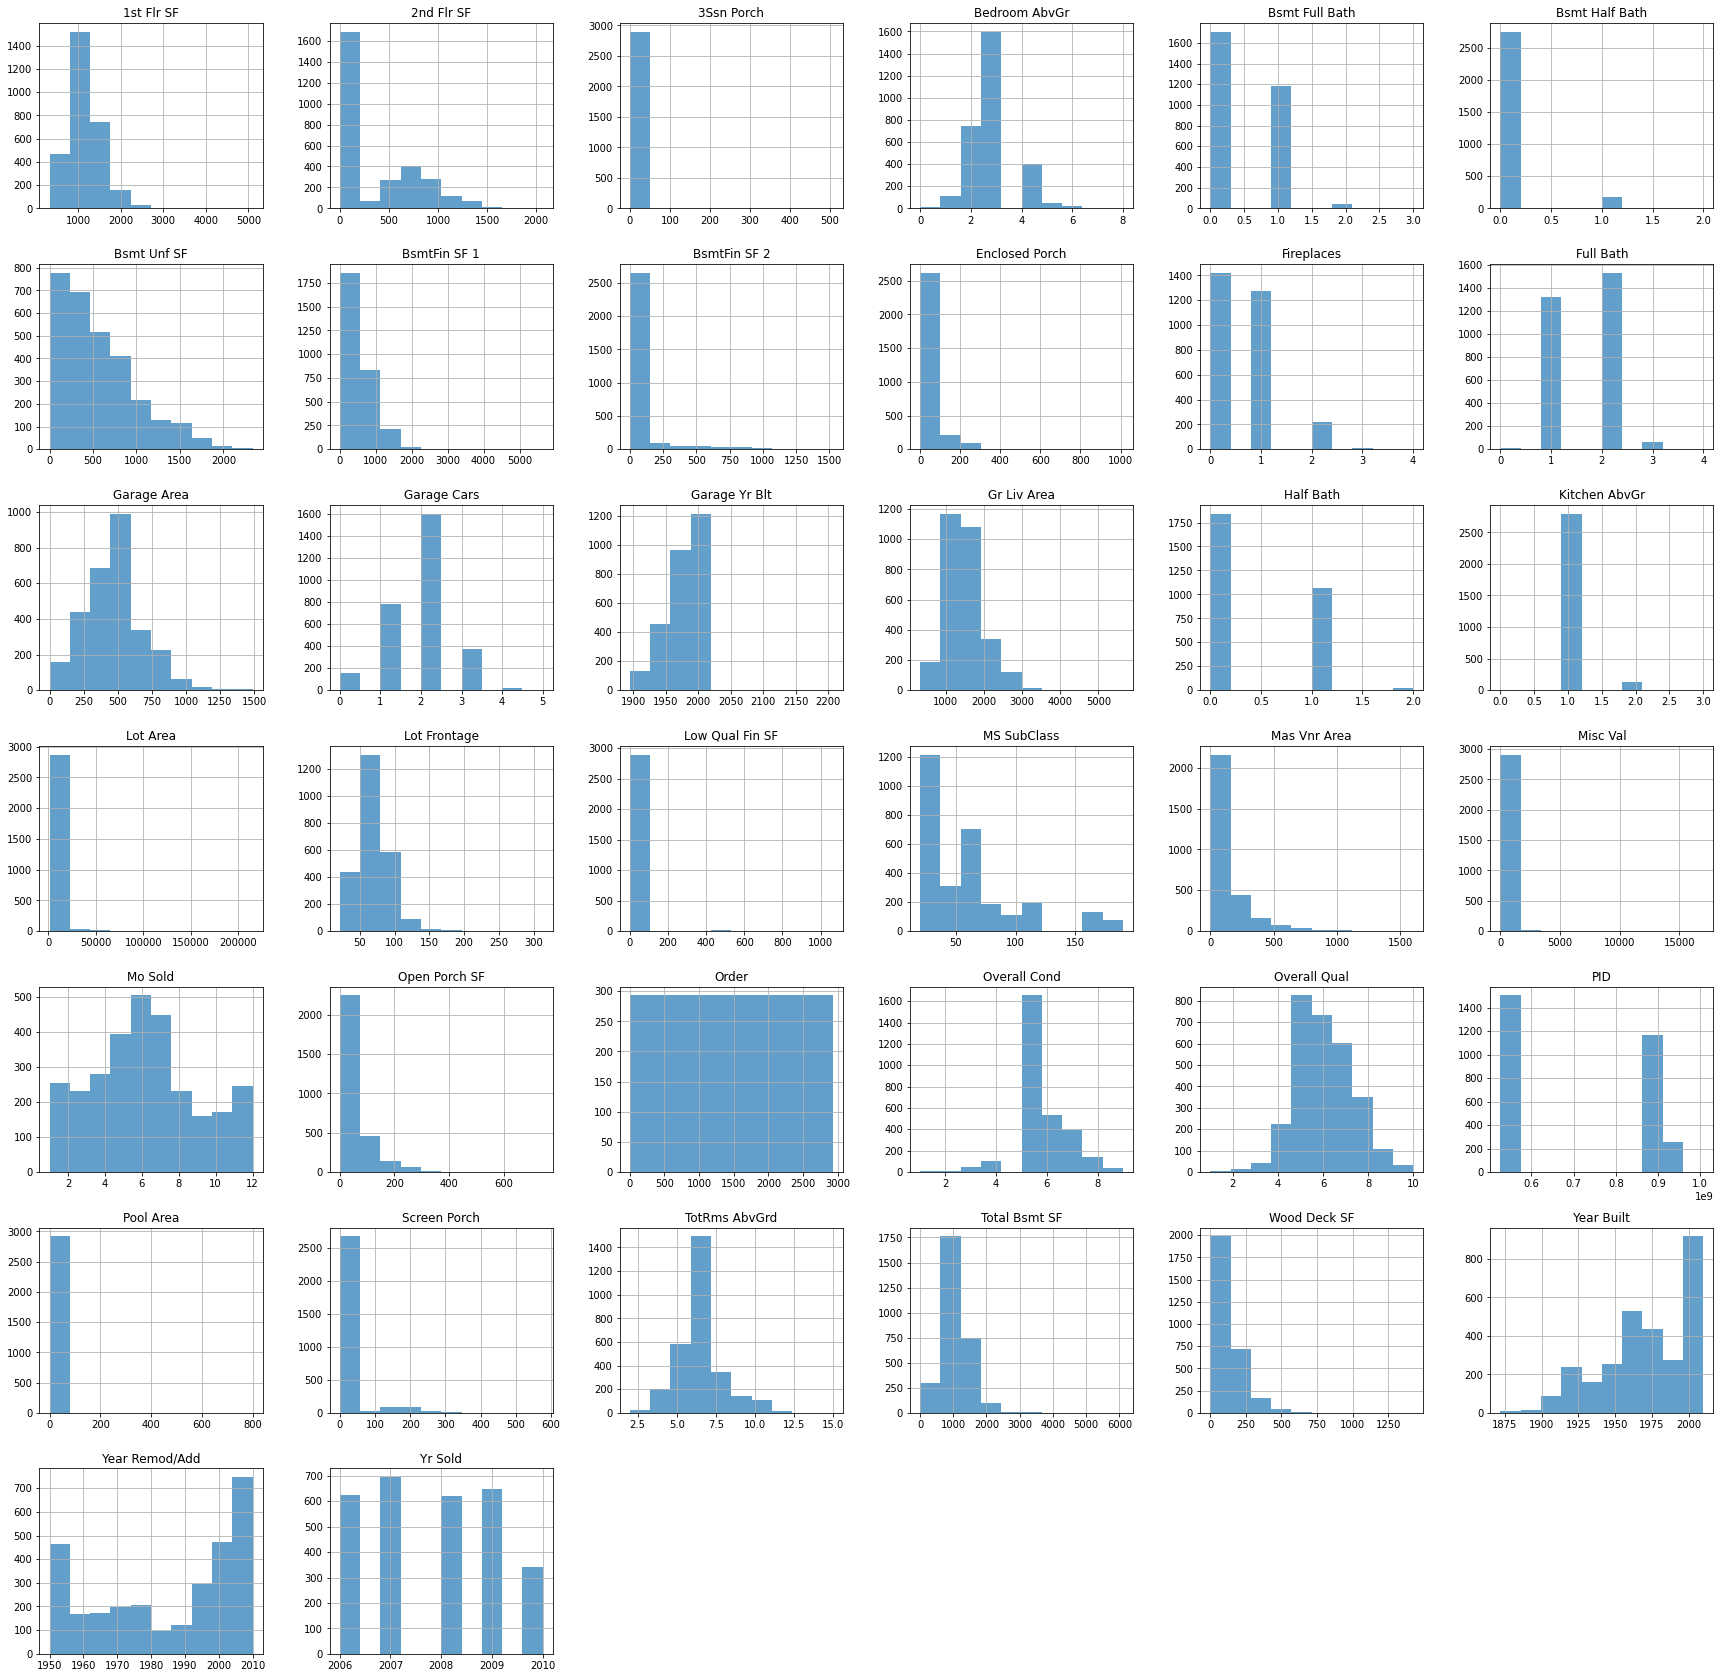

In [ ]:
data_numer.hist(figsize=(30,30),alpha=0.7)

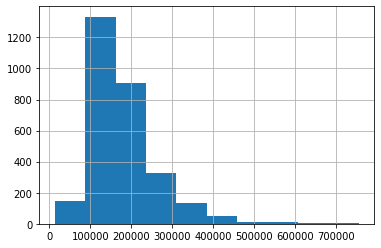

In [ ]:

target.hist()

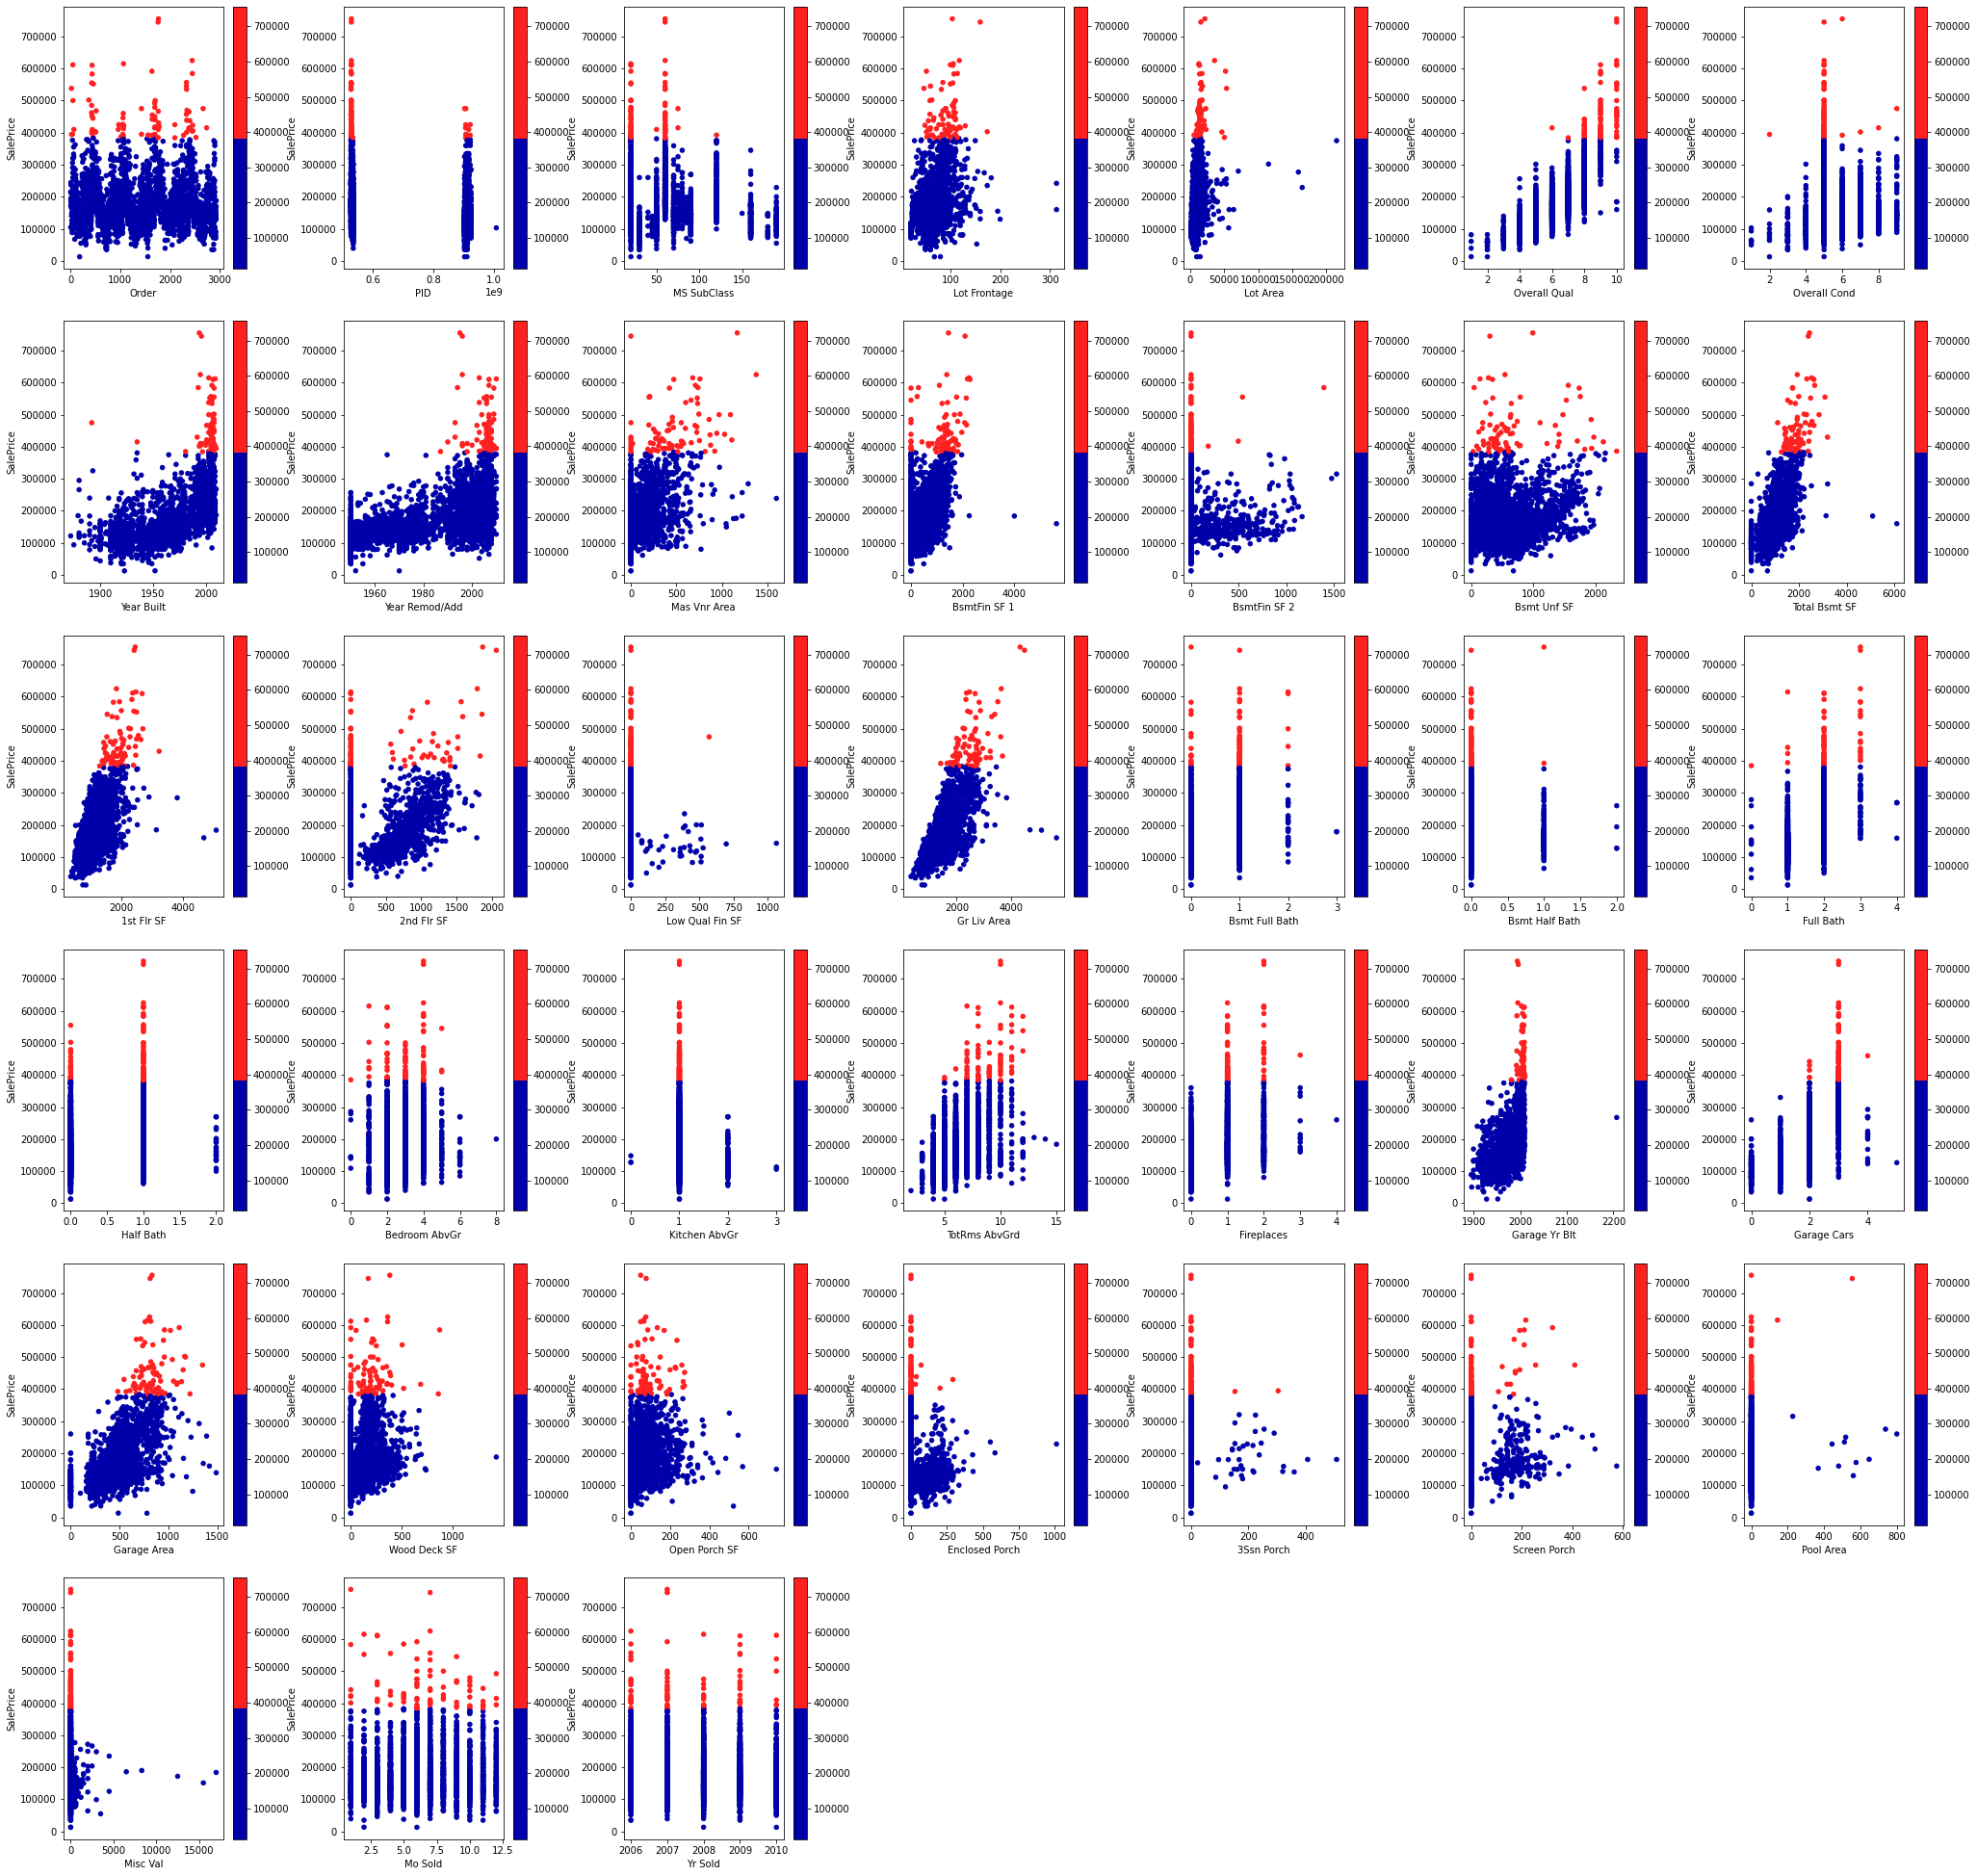

In [ ]:
fig,axes=plt.subplots(6,7,figsize=(35,35))
fig.subplots_adjust(hspace=0.2, wspace=0.4)
for i,axs in zip(numeric,axes.flat):
  Ames.plot(kind='scatter',x=str(i),y='SalePrice',stacked =True,ax=axs,marker='o',cmap=ListedColormap(['#0000aa', '#ff2020']),c=target,legend=True)
for num in [3,4,5,6]:
  fig.delaxes(axes[5,num])
plt.draw()

In [ ]:
Xtrain,Xtest,ytrain,ytest=train_test_split(module_data,target)
lin_results={}
for cat in categ:
  scores=cross_val_score(LinearRegression(),X=pd.get_dummies(Xtrain[cat]),y=ytrain,cv=10,scoring='r2')
  lin_results[cat]=scores.mean()

print(lin_results)

{'Utilities': -2.593823049491994e+24, 'Roof Matl': -2.62145347260019e+23, 'Exterior 1st': -6.797168986724553e+23, 'Functional': -9.920026660608375e+22, 'Bsmt Qual': 0.5123311399880851, 'Neighborhood': -7.001105405955307e+22, 'Heating QC': 0.21526287297000052, 'Sale Type': 0.1385293340471203, 'Sale Condition': 0.14703686736978852, 'Alley': 0.018264092455083536, 'Land Slope': 0.0023065423069322686, 'Exter Qual': 0.5039476128680552, 'Condition 2': -3.931402866936065e+24, 'Foundation': 0.2843698686715065, 'Fireplace Qu': 0.30319676818605634, 'Mas Vnr Type': 0.1829501591735664, 'Central Air': 0.06304372334531529, 'Heating': -1.2387703608934649e+23, 'Garage Qual': 0.06038289433196653, 'Fence': 0.03616976714241958, 'MS Zoning': -1.8196797781556182e+23, 'Street': 0.0008930565566842574, 'Bsmt Cond': 0.04591799447195184, 'Lot Shape': 0.08991020338916836, 'Bsmt Exposure': 0.1662452275690796, 'Electrical': -3.3841032823308955e+22, 'Exter Cond': 0.02175254629053682, 'Roof Style': 0.0537325888206070

['SBrkr' 'FuseA' 'FuseF' 'FuseP' nan]
<class 'str'>


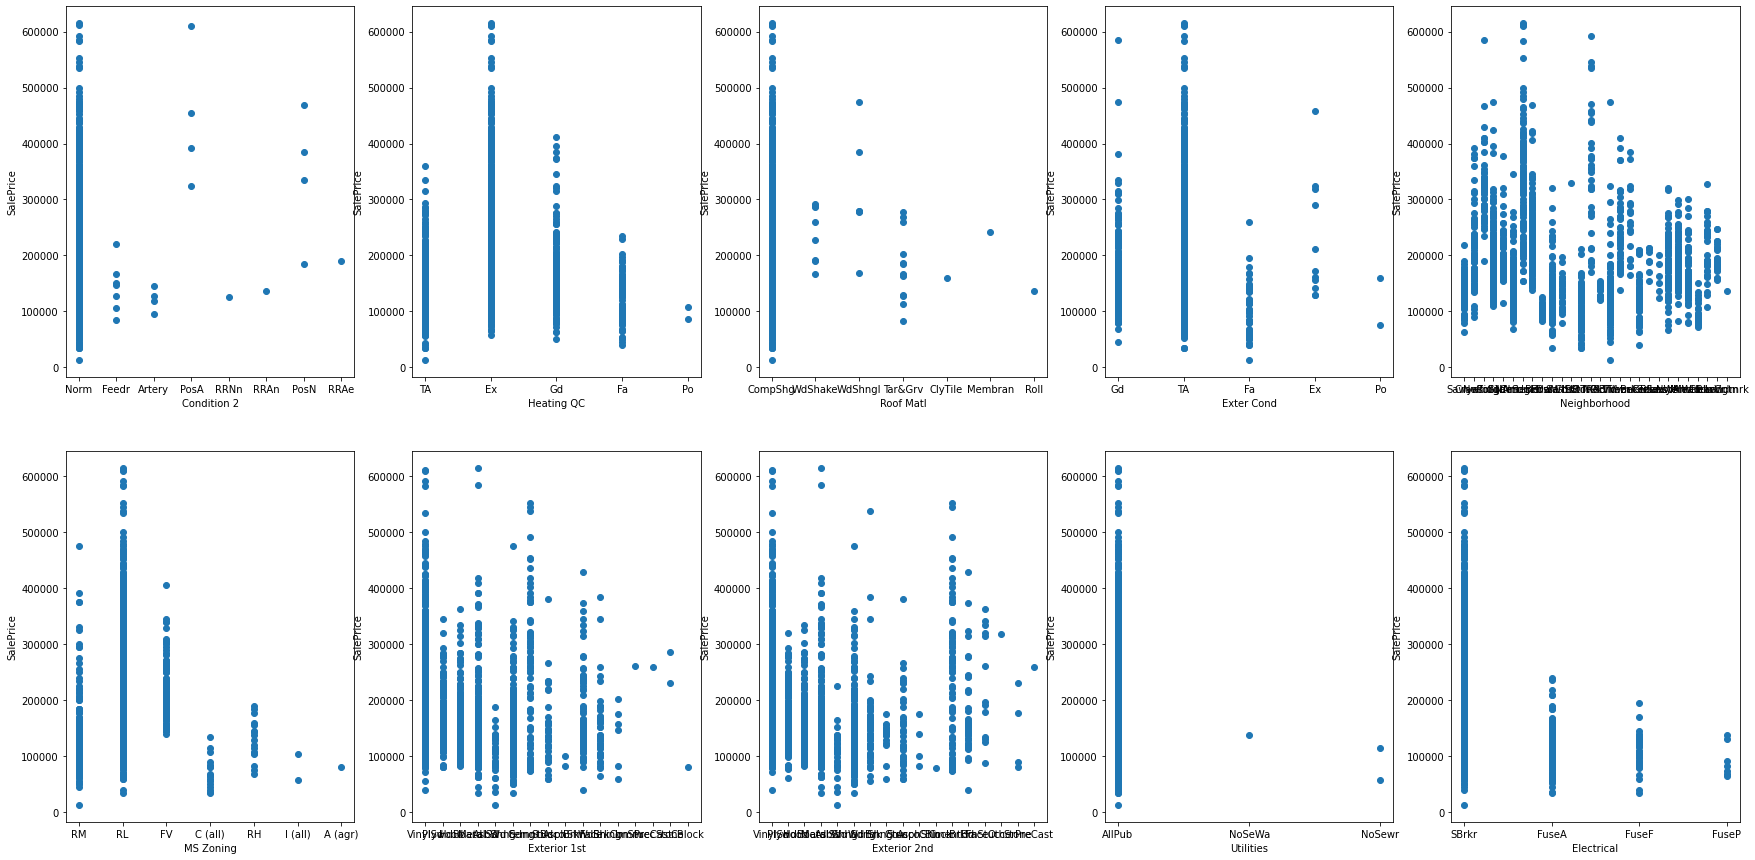

In [ ]:

cat_visu=[['Condition 2','Heating QC','Roof Matl','Exter Cond','Neighborhood'],['MS Zoning','Exterior 1st','Exterior 2nd','Utilities','Electrical']]
print( Xtrain.Electrical.unique())
fig,axs=plt.subplots(2,5,figsize=(30,15))
print(type(cat_visu[1][4]))
for row in range(2):
  for column in range(5):
    axs[row,column].scatter(x=Xtrain[cat_visu[int(row)][int(column)]].fillna(method='backfill'),y=ytrain,marker='o')
    axs[row,column].set_xlabel(str(cat_visu[row][column]))
    axs[row,column].set_ylabel('SalePrice')  


In [ ]:
categorical=Xtrain.dtypes==object
pip1=make_pipeline(SimpleImputer(strategy='mean'),StandardScaler())
pip2=make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder())
pre=make_column_transformer((pip1,~categorical),(pip2,categorical))
pre_xtrain=pre.fit_transform(Xtrain)
print(pre_xtrain.shape)
models_score=[]
models=[LinearRegression(),Ridge(),Lasso(normalize=True),ElasticNet()]
for model in models: 

  score=cross_val_score(model,pre_xtrain,ytrain,cv=10)
  models_score.append(score.mean())
print(models_score)  

(2197, 302)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1730161476.6394043, tolerance: 1230877754.008958
  max_iter, tol, rng, random, positive)


[0.8585583489141909, 0.8607061139896965, 0.8645881471487824, 0.8350163606813041]


In [ ]:
best_tun=[]
grids=[]
models_tun=[Ridge(tol=0.1),Lasso(normalize=True,tol=0.1),ElasticNet(tol=0.1)]
param_grid = [{'alpha': np.logspace(-3, 3, 13)},{'alpha': np.logspace(-3, 0, 13)},{'alpha': np.logspace(-4, -1, 10),
              'l1_ratio': [0.01, .1, .5, .9, .98, 1]}]
for model,param in zip(models_tun,param_grid):

  grid=GridSearchCV(model, param, cv=10,return_train_score=True,scoring='r2').fit(pre_xtrain,ytrain)
  grids.append(grid)
  best_tun.append(grid.best_params_)
print(best_tun)


[{'alpha': 316.22776601683796}, {'alpha': 1.0}, {'alpha': 0.1, 'l1_ratio': 0.1}]


In [ ]:
models_score2=[]
models2=[LinearRegression(),Ridge(alpha=best_tun[0]['alpha']),Lasso(normalize=True,alpha=best_tun[1]['alpha']),ElasticNet(alpha=best_tun[2]['alpha'],l1_ratio=best_tun[2]['l1_ratio'])]
for model in models2: 

  score=cross_val_score(model,pre_xtrain,ytrain,cv=10)
  models_score2.append(score.mean())
print(models_score2)  


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1730161476.6394043, tolerance: 1230877754.008958
  max_iter, tol, rng, random, positive)


[0.8585583489141909, 0.8496918500776591, 0.8645881471487824, 0.8543354149204682]


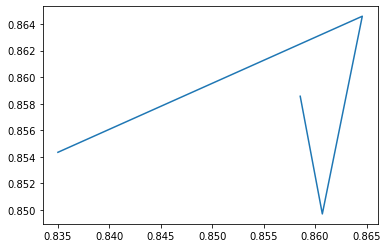

In [ ]:
plt.plot(models_score,models_score2)

In [ ]:
print(len(grids))
asd=param_grid[0].keys

dicti={'a7a':(455,548),'asa':78}
suc=list(dicti.items())
print(len(dicti))
print(suc[0][1])
print(len(param_grid[2]['alpha']))


3
2
(455, 548)
10


In [ ]:
for grid,index in zip(grids,range(len(grids))):
  
  param_dict=param_grid[index]
  for param_num in range(len(param_dict)):
    param_draw=list(param_dict.items())[param_num][1]
    print(len(param_draw))

ValueError: ignored

(13,)


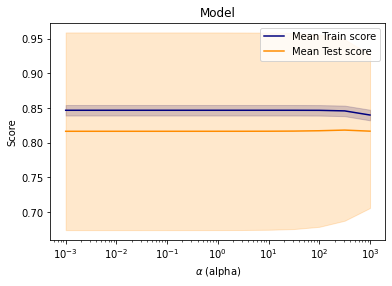

(13,)


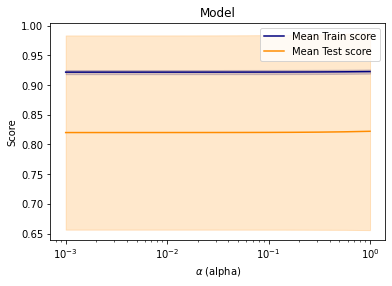

In [ ]:
for grid,index in zip(grids,range(len(grids)-1)):
  
  param_dict=param_grid[index]
  for param_num in range(len(param_dict)):
    
    train_scores_mean = grid.cv_results_["mean_train_score"]
    train_scores_std = grid.cv_results_["std_train_score"]
    test_scores_mean = grid.cv_results_["mean_test_score"]
    test_scores_std = grid.cv_results_["std_test_score"]
    param_draw= list(param_dict.items())[param_num][1]
    print(train_scores_mean.shape)

    plt.figure()
    plt.title('Model')
    plt.xlabel('$\\alpha$ (alpha)')
    plt.ylabel('Score')
    # plot train scores
    plt.semilogx(param_draw, train_scores_mean, label='Mean Train score',
                color='navy')
    # create a shaded area between [mean - std, mean + std]
    plt.gca().fill_between(param_draw,
                          train_scores_mean - train_scores_std,
                          train_scores_mean + train_scores_std,
                          alpha=0.2,
                          color='navy')
    plt.semilogx(param_draw, test_scores_mean,
                label='Mean Test score', color='darkorange')

    # create a shaded area between [mean - std, mean + std]
    plt.gca().fill_between(param_draw,
                          test_scores_mean - test_scores_std,
                          test_scores_mean + test_scores_std,
                          alpha=0.2,
                          color='darkorange')

    plt.legend(loc='best')
    plt.show()

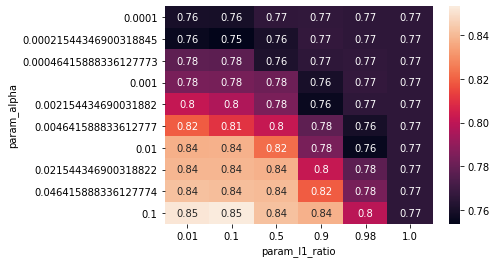

In [ ]:
res= pd.pivot_table(pd.DataFrame(grids[2].cv_results_),
    values='mean_test_score', index='param_alpha', columns='param_l1_ratio')
ses.heatmap(res,annot=True)